<a href="https://colab.research.google.com/github/Rusii123/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_by_Raushan_Kumar_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)





# **Data Science Problem Statement**
### Perform regression analysis using multiple models to predict the number of bike sharing demand and compare the evaluation metrics for all of them to find the best model.

# **Team Members**
### 1. Premanand Gaikwad
### 2. Raushan Kumar

----------

 First of all, let's Import the required libraries and modules.

In [ ]:
# Basic Labraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime as dt

In [ ]:
# Libararies for Ml model and evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Let's mount our Drive to get the csv file , and further provide its path to get it stored in an identifier so that data stored in it can be viewed and extracted as per need .

In [ ]:
#importing csv file from our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#storing the data and reading it
data_path = '/content/drive/MyDrive/AlmaBetter/Projects/Capstone Projects/ML Capstone Projects/Supervised Learning Capstone Projects/Regression based Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'


In [ ]:
df = pd.read_csv(data_path,encoding= 'unicode_escape')

In [ ]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#getting some basic information about the given data table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#To understands the statistics of columns that have numeric data types.
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#check missing values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

---

# **Exploratory Data Analysis and Data Pre-Processing**

---

**Get the number of unique values in the features to know the categorical and continuous features:**

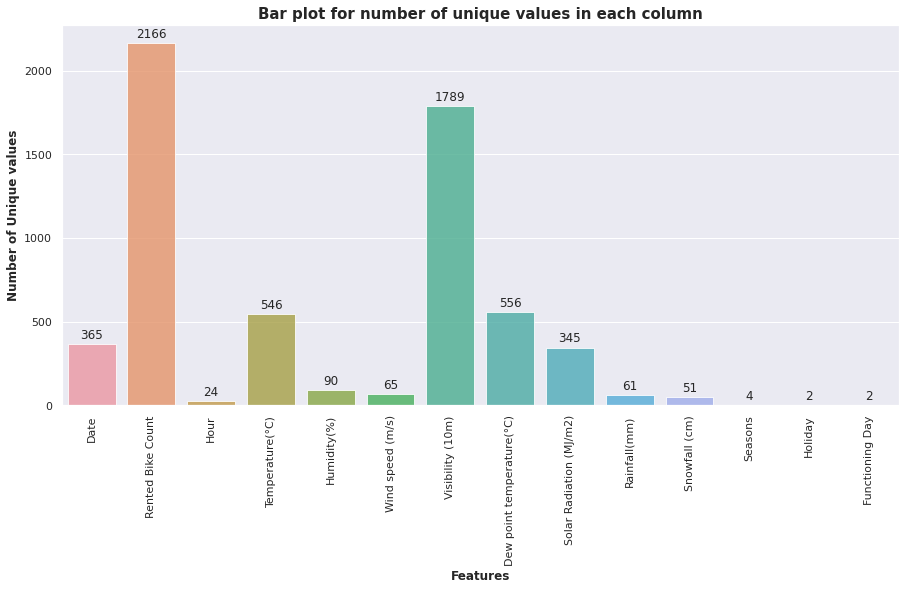

In [ ]:
# Unique Values in each column
sns.set()
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Number of Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Unique values of the categorical features:**

In [ ]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
len(df.Date.unique())

365

**Renaming our columns for easy accessibility**



In [ ]:
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### **Datetime Analysis**

**Converting the date column from object to datetime datatype:**

In [ ]:
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Days between which the data is collected
print('Start date: ',df['date'].min())
print('End date: ',df['date'].max())

Start date:  2017-12-01 00:00:00
End date:  2018-11-30 00:00:00


In [ ]:
# Number of days for which the data is collected
print('Number of days the data is collected: ',df['date'].max()-df['date'].min())

Number of days the data is collected:  364 days 00:00:00


**Deriving new columns 'month' and 'day_of_week' from the 'date' column:**

In [ ]:
#add month, day_of_week columns
for df in [df]:
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek             # {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

**Adding new column 'weekend', which indicates whether a given day is a weekday(0) or a weekend(1).**

In [ ]:
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0


## **Univariate Analysis**

**Analyzing the distribution of the dependent variable:**

In [ ]:
dependent_variable = ['rented_bike_count']

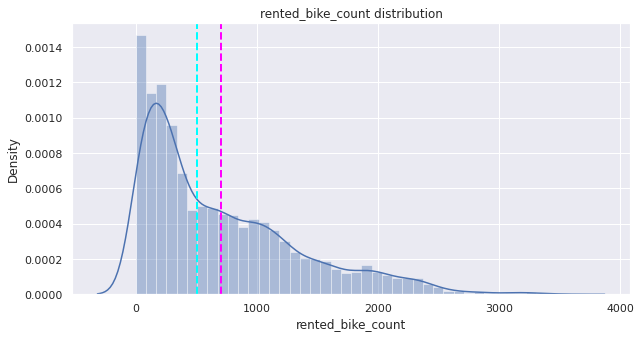

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

The dependent variable is positively skewed.

**Analyzing the distribution of the continuous independent variables:**

In [ ]:
continuous_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

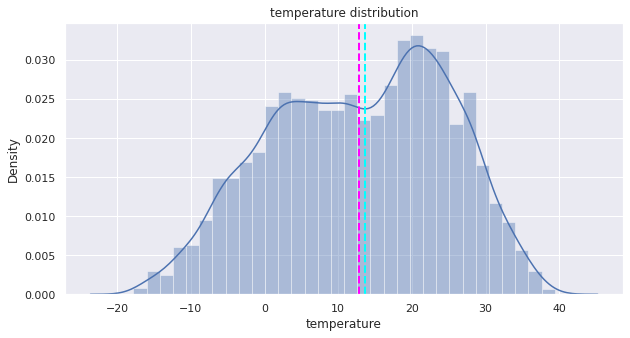

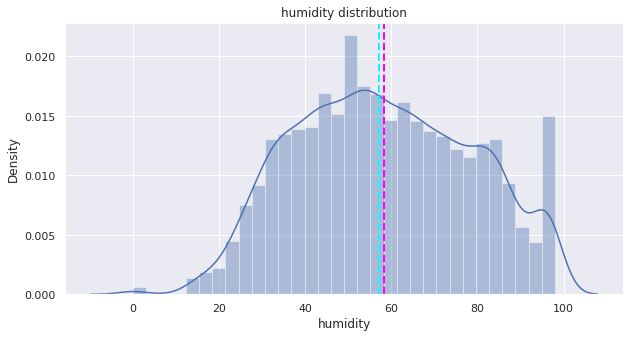

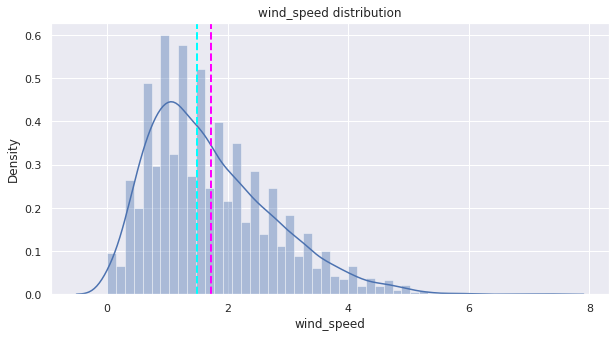

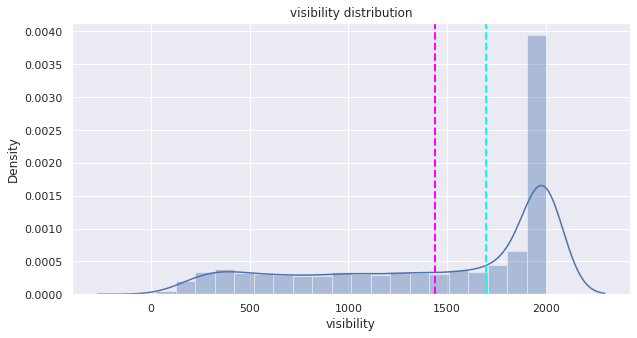

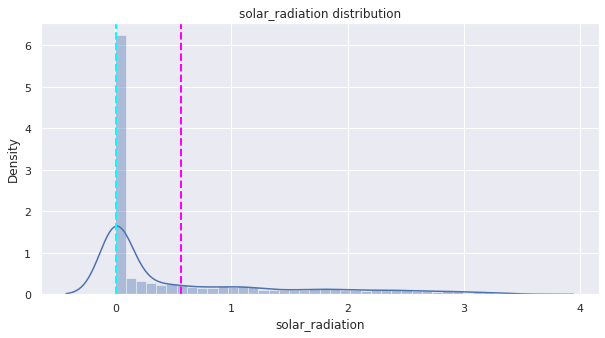

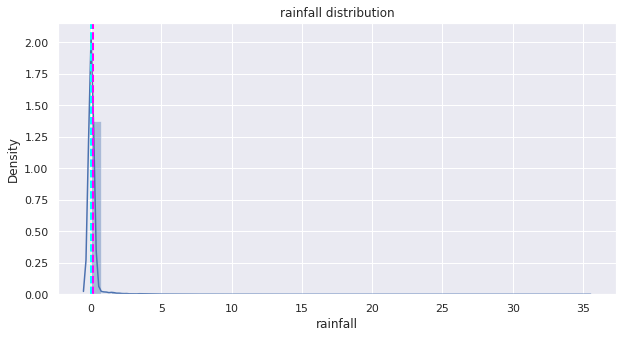

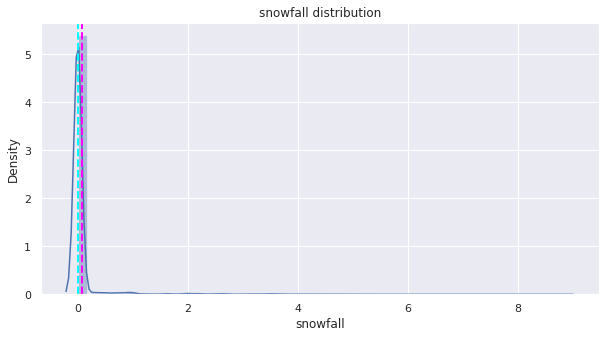

In [ ]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Summary:

* Normally distributed attributes: temperature, humidity.
* Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.
* Negatively skewed attributes: visibility.

So,that we need to use log transformation to reduce skewness during Ml modeling

**Checking the Oulier:**

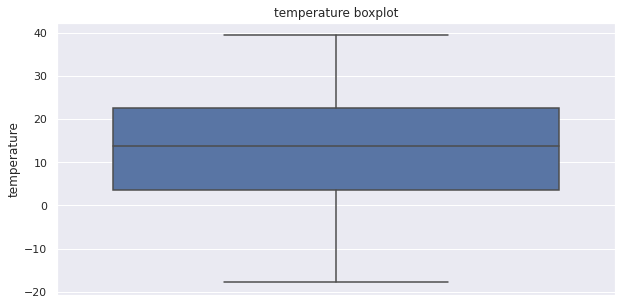

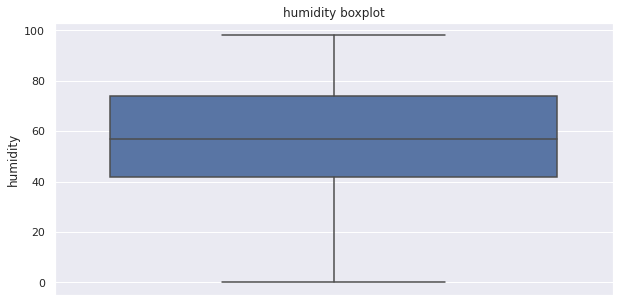

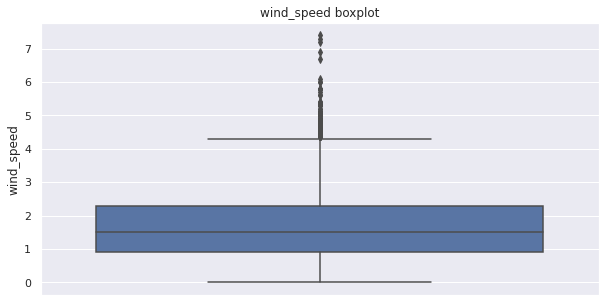

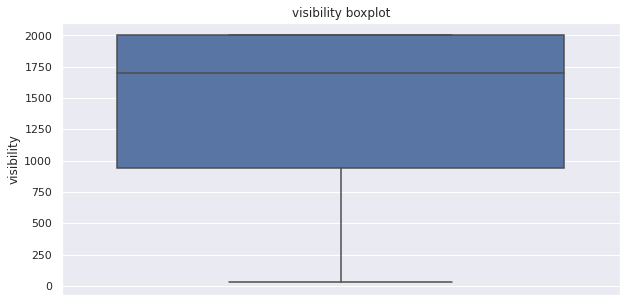

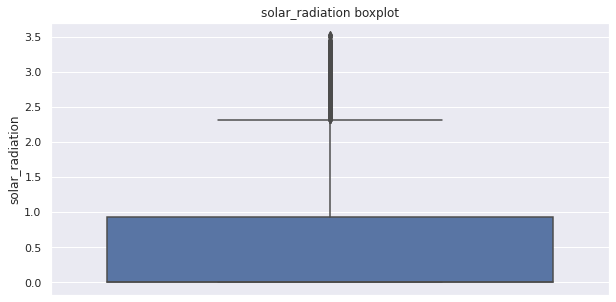

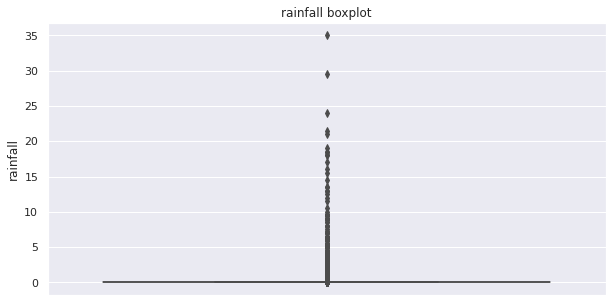

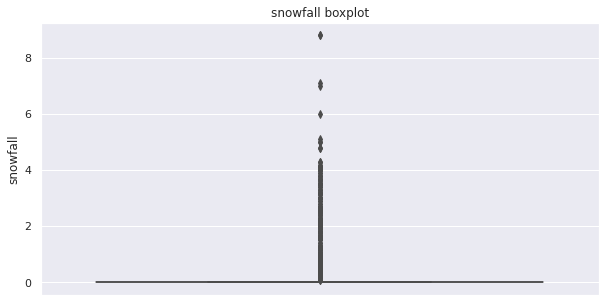

In [ ]:
# checking the outlier in continuous variable
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,data=df)
  plt.title(col+' boxplot')
  plt.show()

As above very less negligible outlier present in the data

## **Bivariate Analysis**

**Analyzing the relationship between the dependent variable and the continuous variables in the data:**

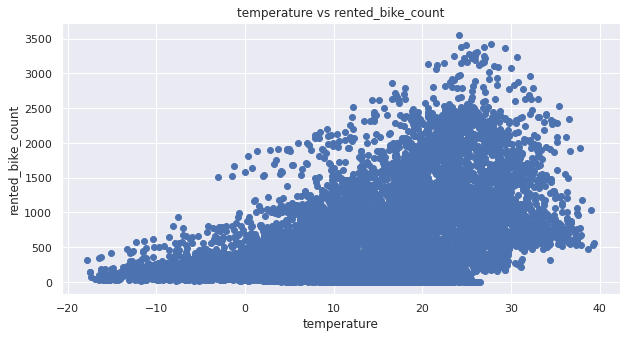

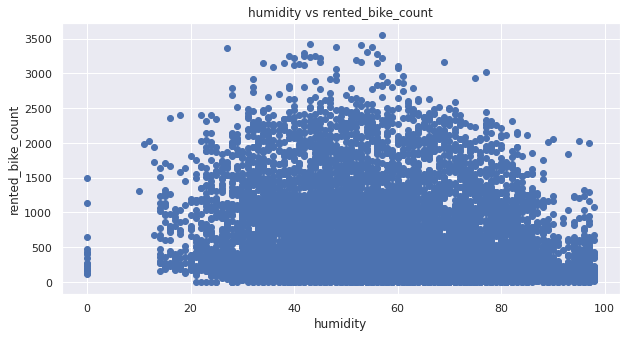

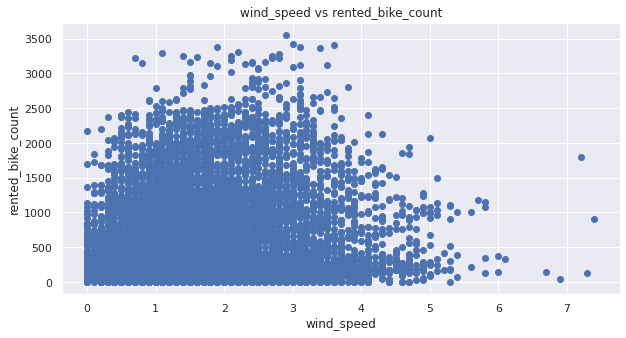

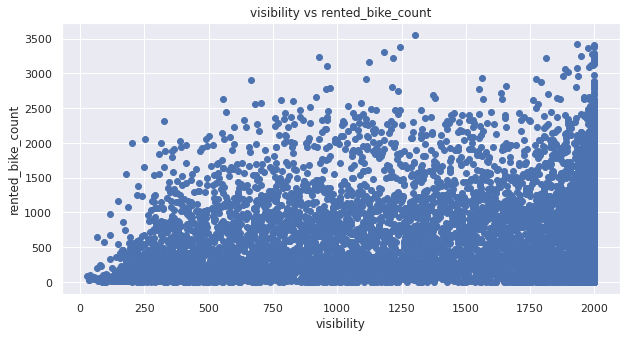

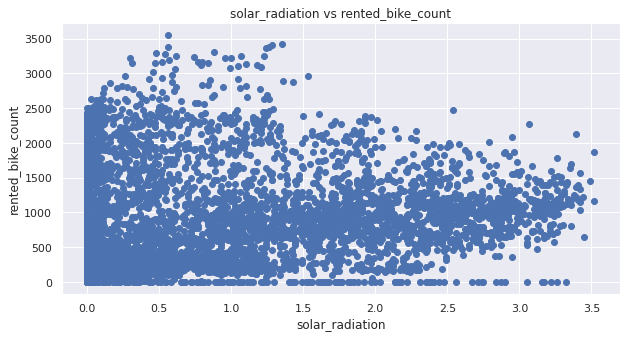

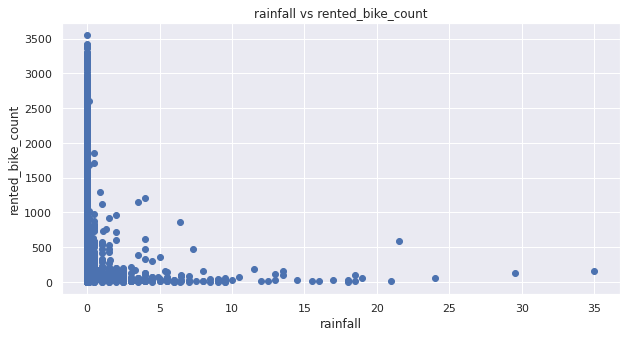

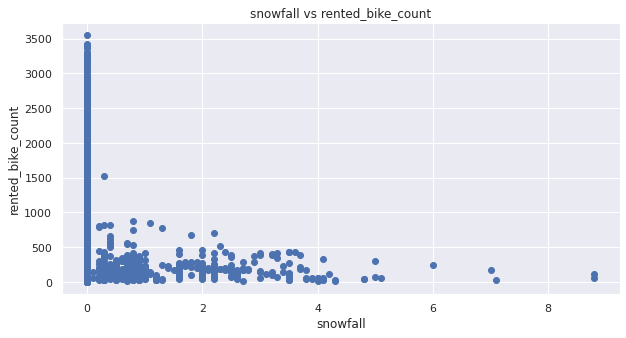

In [ ]:
for i in continuous_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

Summary:

* Positively correlated variables: temperature, windspeed, visibility, solar radiation.
* Negatively correlated variables: humidity, rainfall, snowfall.

**Analyzing the relationship between the dependent variable and the categorical variables using boxplot:**

In [ ]:
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

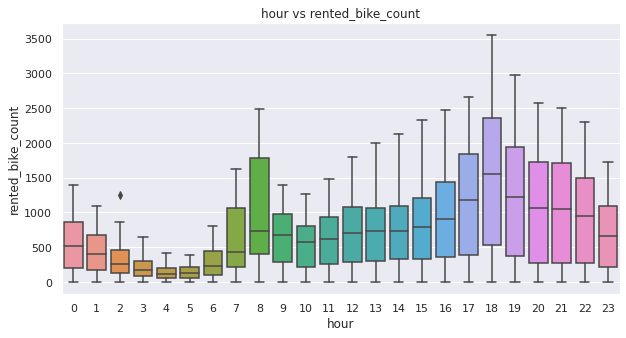

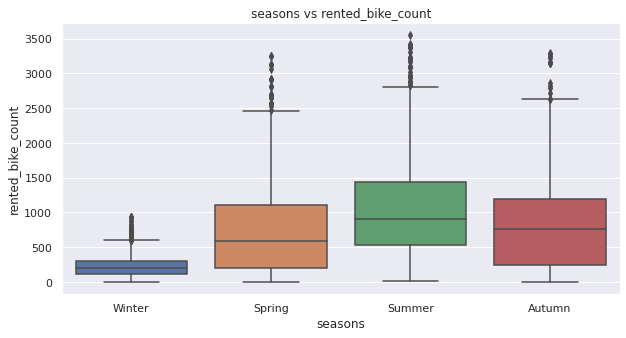

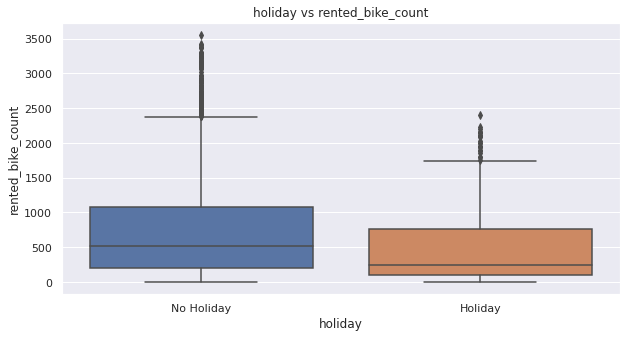

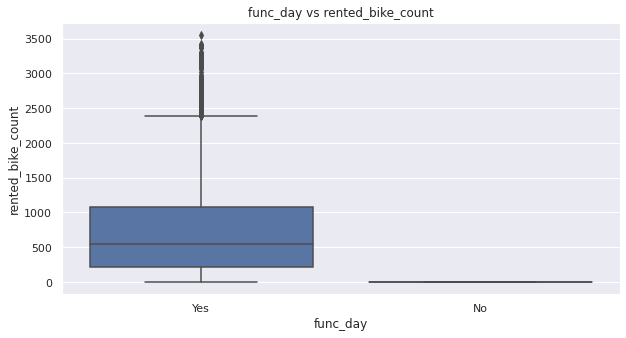

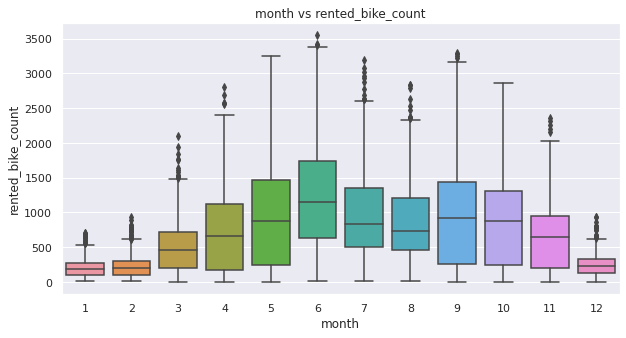

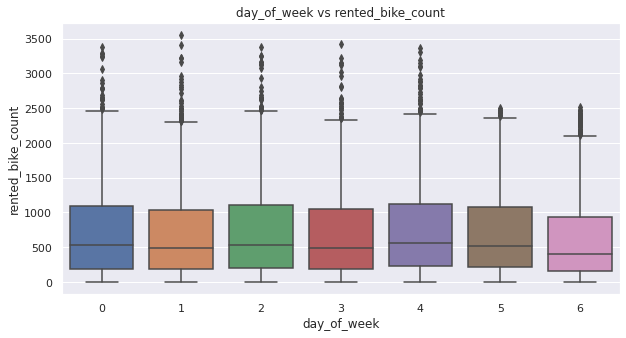

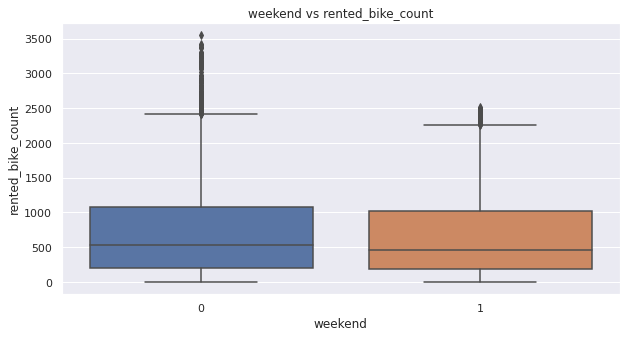

In [ ]:
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

From above it is seen that some outlier are present in some category so that there are outstanding demand in some category.

In [ ]:
# Highest rented bike count on a functioning day vs a non functioning day
df.groupby(['func_day'])['rented_bike_count'].max().reset_index()

,func_day,rented_bike_count
0,No,0
1,Yes,3556


In [ ]:
# Non functioning days in the dataset
df[(df['func_day']=='No')]['date'].unique()

array(['2018-04-11T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000'], dtype='datetime64[ns]')

On a non functioning day, no bikes are rented in all the instances of the data.





Summary:

* The number of bikes rented is on average higher during the rush hours.
* The rented bike counts is higher during the summer and lowest during the winter.
* The rented bike count is higher on working days than on non working days.
* On a non functioning day, no bikes are rented in all the instances of the data.
* The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday, and on average, the rented bike counts is lower on weenends than on weekdays.


**Bike demand throughout the day:**

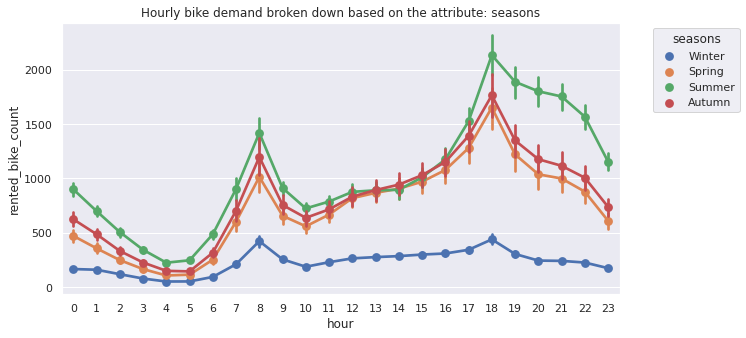

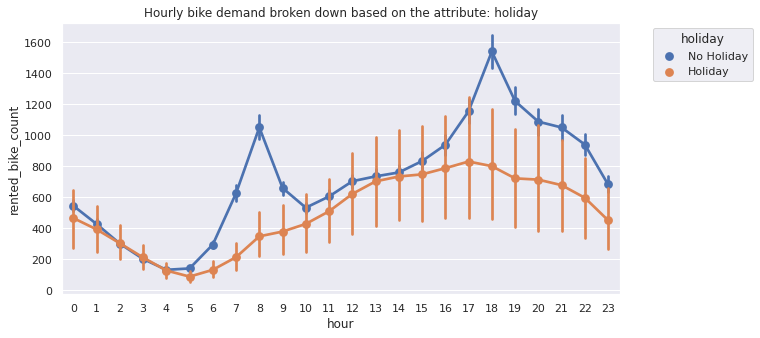

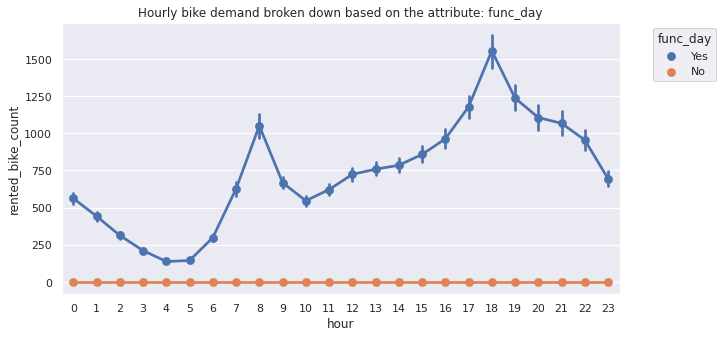

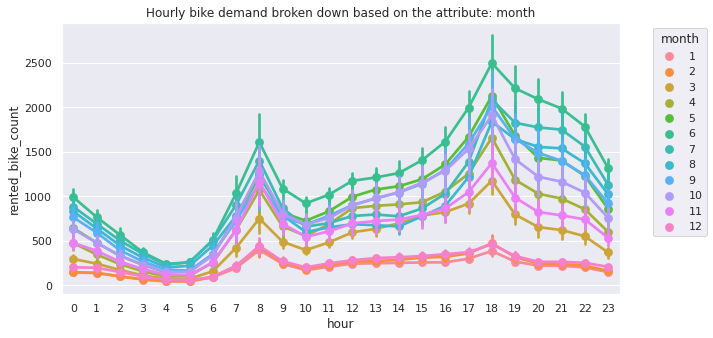

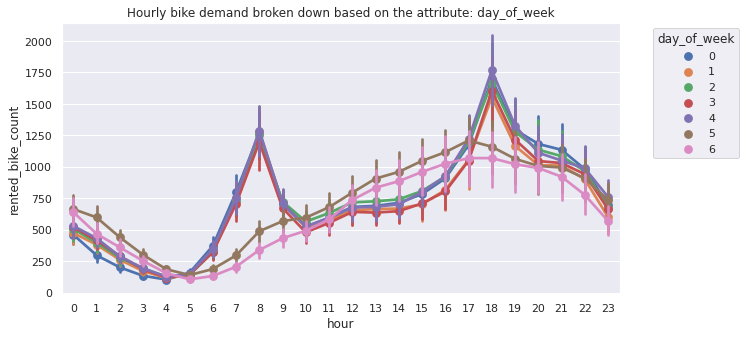

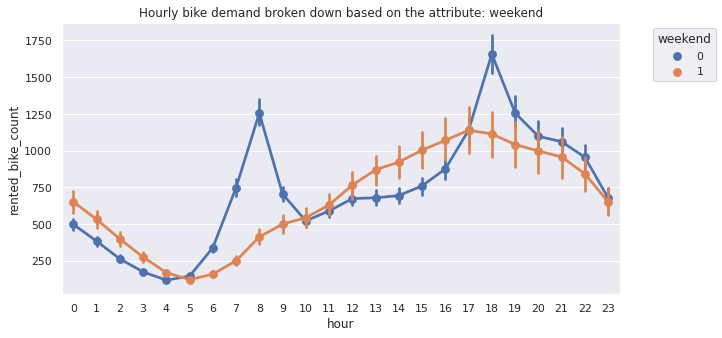

In [ ]:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

Summary:

* In winters the overall demand for rented bikes is comparitively lower than that of other seasons.
* On a non functioning day, no bikes are rented.
* The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons

## **Multivariate Analysis**

**Checking For Multicollinearity:**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

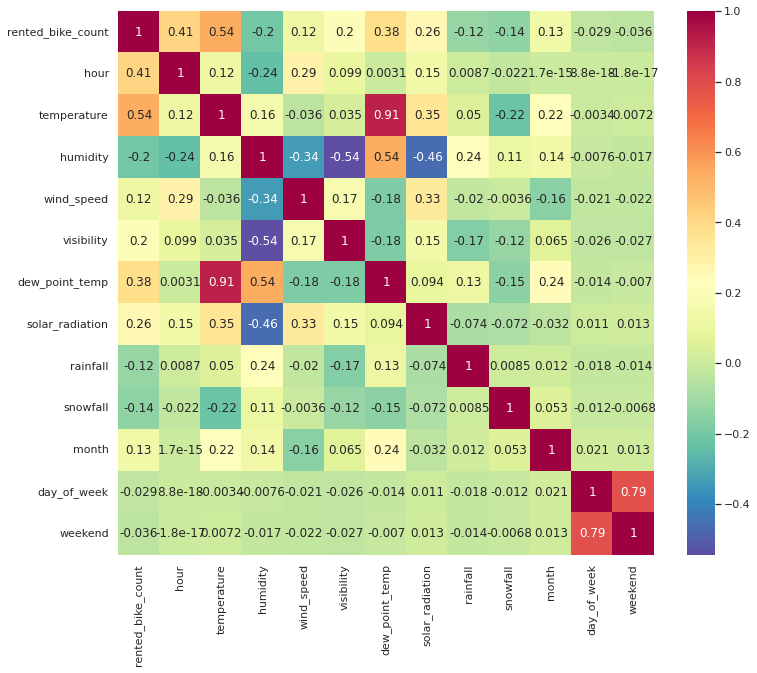

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

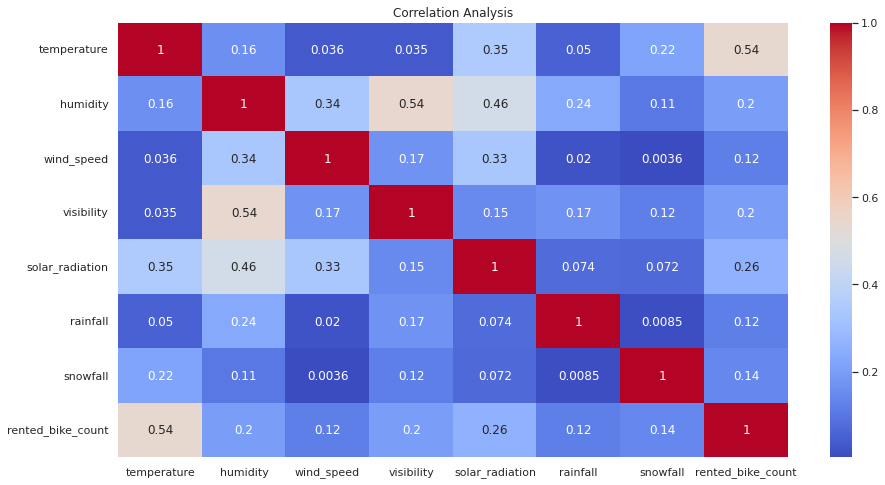

In [ ]:
 ## Correlation magnitude for continuous variables
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var+dependent_variable].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is less multicollinerity in the data.

# **Data Pre-processing**

**Handling the Outlier by Capping**

In [ ]:
#Capping the outlier rows with Percentiles
for a in continuous_var:
  upper_lim = df[a].quantile(.95)
  lower_lim = df[a].quantile(.05)
  df.loc[(df[a] > upper_lim),a] = upper_lim
  df.loc[(df[a] < lower_lim),a] = lower_lim

Above we have capped the outlier having values greater than 95 percentile at higher level which is at 95 Percentile.

**Skewness reduction by log transformation**

In [ ]:
# by using log transformation we have reduced the skewness
df['wind_speed'] = (df['wind_speed']+1).transform(np.log)
df['solar_radiation'] = (df['solar_radiation']+1).transform(np.log)
df['snowfall'] = (df['snowfall']+1).transform(np.log)
df['rainfall'] = (df['rainfall']+1).transform(np.log)
df['visibility'] = (df['visibility']+1).transform(np.log)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,1.163151,7.601402,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
1,2017-12-01,204,1,-5.5,38,0.587787,7.601402,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
2,2017-12-01,173,2,-6.0,39,0.693147,7.601402,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
3,2017-12-01,107,3,-6.2,40,0.641854,7.601402,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
4,2017-12-01,78,4,-6.0,36,1.193922,7.601402,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0


**Encoding the data to fit a model using One Hot Label Encoding :**

In [ ]:
# label encoding the data   
le = LabelEncoder() 
  
df['holiday']= le.fit_transform(df['holiday']) 
df['func_day']= le.fit_transform(df['func_day'])
df['seasons']= le.fit_transform(df['seasons'])

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,1.163151,7.601402,-17.6,0.0,0.0,0.0,3,1,1,12,4,0
1,2017-12-01,204,1,-5.5,38,0.587787,7.601402,-17.6,0.0,0.0,0.0,3,1,1,12,4,0
2,2017-12-01,173,2,-6.0,39,0.693147,7.601402,-17.7,0.0,0.0,0.0,3,1,1,12,4,0
3,2017-12-01,107,3,-6.2,40,0.641854,7.601402,-17.6,0.0,0.0,0.0,3,1,1,12,4,0
4,2017-12-01,78,4,-6.0,36,1.193922,7.601402,-18.6,0.0,0.0,0.0,3,1,1,12,4,0


As we have added month, day of week column and weekend feature by using date feature so that we will drop it.

In [ ]:
df.drop('date',axis=1,inplace=True)

In [ ]:
df.shape

(8760, 16)

---
# **Machine learning Models**
---

**The prediction model should be chosen in such a way that it:**
* Is able to predict the dependent variable with high accuracy (Accuracy).
* Is easy to interpret (Interpretability)
* Is easy to explain the model (Explainability).

**Modeling approach:**

* Use a linear regressor model to come up with initial set of predictions (baseline model)
* Calculate the model accuracy using the regression evaluation metrics.
* Then add regularization model (lasso, Ridge) and check the accuracy.
* Improve the model accuracy by hyperparameter tuning.
* Find feature importances from the baseline model.
* Use bagging/boosting algorithms to increase the model accuracy.
* Choose the model with the highest accuracy for deployment

**Choice of split:**

Since the dataset used here is compact with just 8760 records, and 16 features(after adding 3 feature and droping 1) attributes, we can use cross validation rather than train-test split while tunning.

**Evaluation metrics:**

* In linear regression evaluation matrics like r2 score, MSE, MAE, RMSE are mostly use to find out the accuracy and error in prediction of the demand, so that we will used that matrics to evaluate our model.

**Why is accuracy in prediction of dependent variable important in businesses?**

There are many reasons, some of them in this context are:
* Ensuring enough supply of bikes
* Scheduling the right amount of staff
* Making attainable financial plans
* Strategically planning marketing campaigns

These are some of the reasons why it is necessary to achieve higher prediction accuracies with the help of complex ML algoriths.

[Reference](https://smallbusiness.chron.com/advantages-accurate-forecasting-60830.html)

# From this point on we will run different Regression models with the same data.


I will store the evaluation metrics for each regression model into this data frame to compare at the end.

In [ ]:
#empty data frame creation
i=0
evaluation_df=pd.DataFrame()

## **1. Linear Regression Model**

In this we will take "Rented Bike count" as independent variable i.e x and remaining features takes as dependent variable i.e y

In [ ]:
# Defining dependent and independent variables
X = (df.drop('rented_bike_count',axis=1))
y = (df[dependent_variable])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#data transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Linear Regression to the Training set
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predictions
y_pred = lr.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =lr.score(X_test,y_test)
print("SCORE :", SCORE)

MAE : 315.87900752921763
MSE : 178834.2632848212
RMSE : 422.8880032405994
SCORE : 0.5727010483585289


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Linear Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: LINEAR REGRESSION')

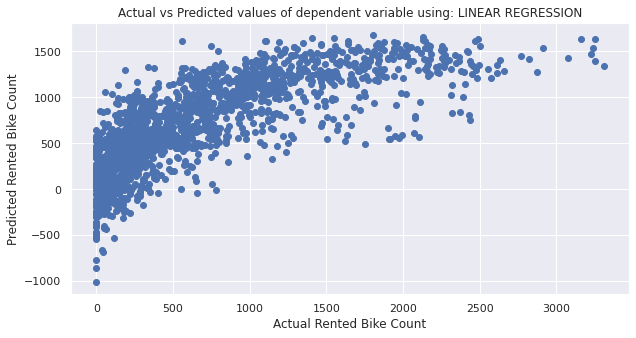

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: LINEAR REGRESSION')

## **2. Regularization Lasso Regression**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# check the score before crossvalidation
lasso.score(X_train, y_train)

0.5862413329793859

In [ ]:
#cross validation
lasso = Lasso()
scoring=make_scorer(r2_score) 
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring=scoring, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring=make_scorer(r2_score))

In [ ]:
# Know the best parameter
lasso_regressor.best_params_

{'alpha': 0.01}

In [ ]:
lasso_y_test_pred=lasso_regressor.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (lasso_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (lasso_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =lasso_regressor.score(X_test,y_test)                           # in this scire is nothing but r2 score because while cross validation we have taken r2 score
print("SCORE :", SCORE)

MAE : 315.8577836148803
MSE : 178822.67747225738
RMSE : 422.87430457791754
SCORE : 0.5727287310043011


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Lasso Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: LASSO REGRESSION')

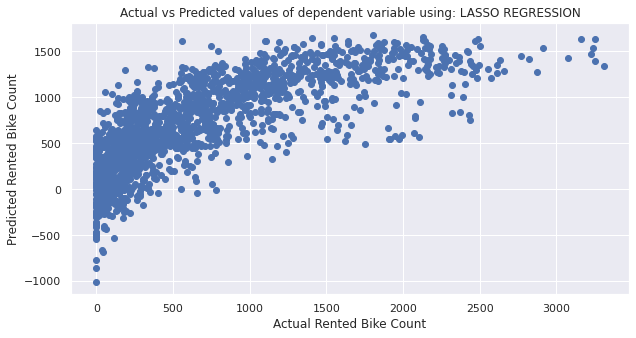

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=lasso_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: LASSO REGRESSION')

In lasso regresion we got alsmost same accuracy as in linear regression.

# **3. Regularization Ridge Regressor**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
ridge.score(X_train, y_train)

0.5862412916214401

In [ ]:
# Cross validation
ridge = Ridge()
scoring=make_scorer(r2_score) 
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring=scoring, cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring=make_scorer(r2_score))

In [ ]:
# Know the best parameter
ridge_regressor.best_params_

{'alpha': 1e-15}

In [ ]:
#Prediction
ridge_y_test_pred = ridge_regressor.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (ridge_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (ridge_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =ridge_regressor.score(X_test,y_test)                           # in this scire is nothing but r2 score because while cross validation we have taken r2 score
print("SCORE :", SCORE)

MAE : 315.87900752921746
MSE : 178834.26328482115
RMSE : 422.88800324059935
SCORE : 0.5727010483585291


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Ridge Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: Ridge REGRESSION')

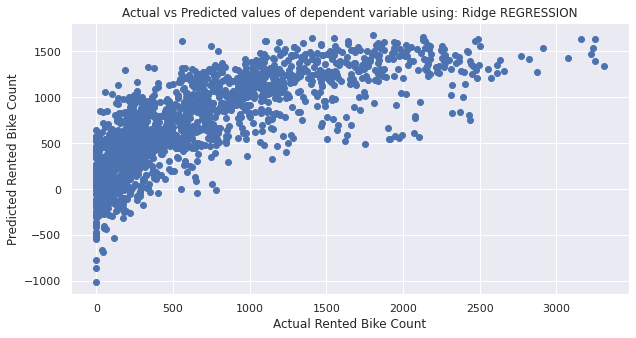

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=ridge_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: Ridge REGRESSION')

## **4. Decision Tree Regression:**

In [ ]:
# Decision tree Model
dt_model = DecisionTreeRegressor(random_state=0)

In [ ]:
# Cross_validation
dt_params = {'max_depth':np.arange(10,26),
             'min_samples_leaf':np.arange(1,10,2)
             }
scoring=make_scorer(r2_score)                                         # make scoring 
                                                                      # It takes a score function, such as accuracy_score, mean_squared_error, adjusted_rand_score or average_precision_score and returns a callable that scores an estimator’s output. 
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=6,
                             scoring=scoring
                            )
dt_gridsearch.fit(X_train,y_train)


GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9])},
             scoring=make_scorer(r2_score))

In [ ]:
# know the best parameter fit
dt_gridsearch.best_params_

{'max_depth': 14, 'min_samples_leaf': 3}

In [ ]:
# train score
dt_gridsearch.score(X_train,y_train)

0.967340807705739

In [ ]:
# prediction 
dt_y_test_pred = dt_gridsearch.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (dt_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (dt_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =dt_gridsearch.score(X_test,y_test)                           # in this scire is nothing but r2 score because while cross validation we have taken r2 score
print("SCORE :", SCORE)

MAE : 128.12456293836772
MSE : 49828.915152534406
RMSE : 223.22391259122398
SCORE : 0.8809409180599849


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Dicision Tree Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: DECISION TREE')

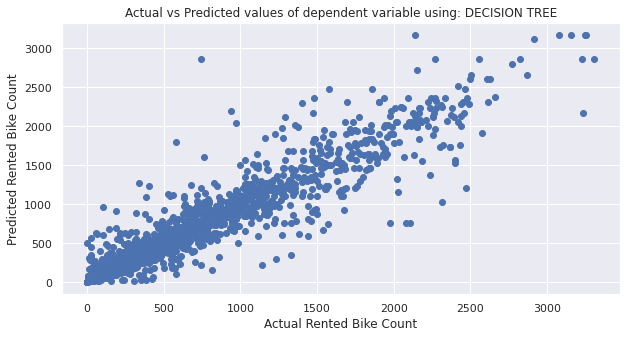

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=dt_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: DECISION TREE')

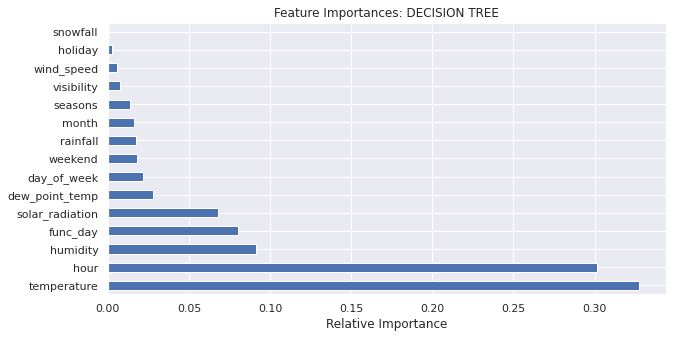

In [ ]:
# Feature importances
dt_feat_imp = pd.Series(dt_gridsearch.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

Top 5 features used to build the decision tree model:
* temperature
* hour
* humidity
* func_day
* solar_radiation

## **5. Random Forests Regression**

In [ ]:
# random forest model
rf_model = RandomForestRegressor(random_state=0)

In [ ]:
 #cross-validation
 rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(1,5)}     # Approximate range after fitting a decision tree model
 scoring=make_scorer(r2_score)
 rf_gridsearch = GridSearchCV(rf_model,
                             rf_params,
                             cv=6,
                             scoring=scoring)
 rf_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=0),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4]),
                         'n_estimators': [300]},
             scoring=make_scorer(r2_score))

In [ ]:
# best parameters for random forests
rf_gridsearch.best_params_

{'min_samples_leaf': 1, 'n_estimators': 300}

In [ ]:
# train score
rf_gridsearch.score(X_train,y_train)

0.9910991849033145

In [ ]:
rf_y_test_pred = rf_gridsearch.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (rf_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (rf_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =rf_gridsearch.score(X_test,y_test)
print("SCORE :", SCORE)

MAE : 98.85659817351599
MSE : 29753.157145027904
RMSE : 172.4910349700178
SCORE : 0.9289090769152768


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Random Forest Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: RANDOM FOREST REGRESSION')

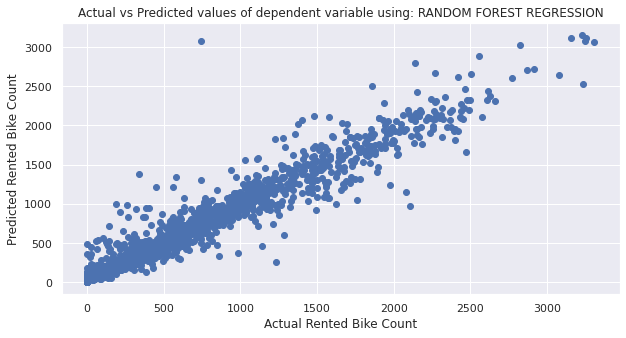

In [ ]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=rf_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST REGRESSION')

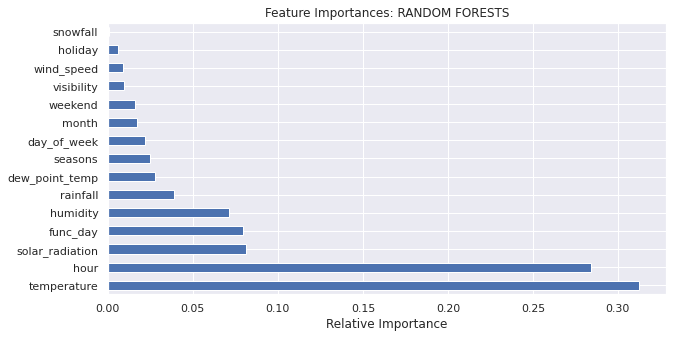

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_gridsearch.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Top 5 features used to build the random forest model:
* temperature
* hour
* solar_radiation
* humidity
* func_day

## **6. Gradient Boosting Regression**

In [ ]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)

In [ ]:
# finding best parameters
gb_params = {'n_estimators':[700],
             'min_samples_leaf':np.arange(25,29)}
scoring=make_scorer(r2_score)
gb_gridsearch = GridSearchCV(gb_model,
                             gb_params,
                             cv=6,scoring=scoring)
gb_gridsearch.fit(X_train,y_train)


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'min_samples_leaf': array([25, 26, 27, 28]),
                         'n_estimators': [700]},
             scoring=make_scorer(r2_score))

In [ ]:
# GBM best parameters
gb_gridsearch.best_params_

{'min_samples_leaf': 28, 'n_estimators': 700}

In [ ]:
# train score
gb_gridsearch.score(X_train,y_train)

0.9491375614463803

In [ ]:
gb_y_test_pred = gb_gridsearch.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (gb_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (gb_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =gb_gridsearch.score(X_test,y_test)
print("SCORE :", SCORE)

MAE : 115.89953603881995
MSE : 32574.616040704703
RMSE : 180.48439278980524
SCORE : 0.9221676035193086


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Gradient Boosting Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

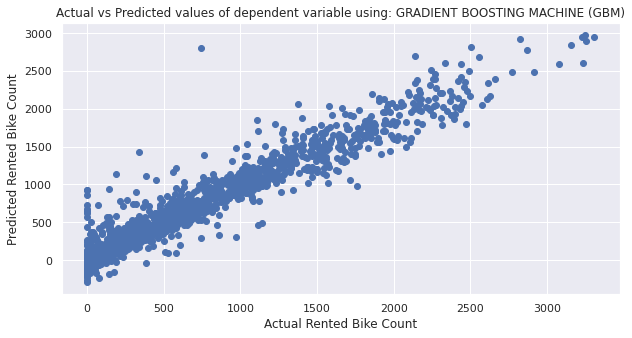

In [ ]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=gb_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

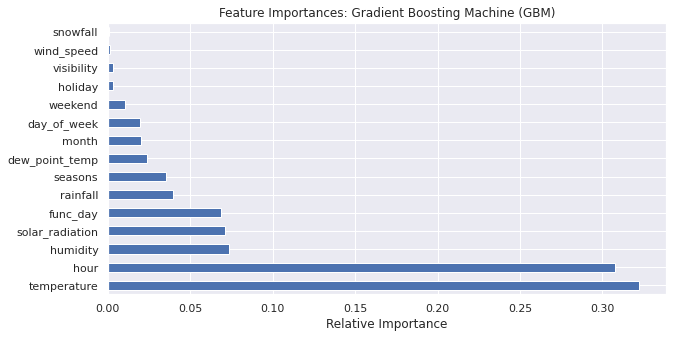

In [ ]:
gbm_feat_imp = pd.Series(gb_gridsearch.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: Gradient Boosting Machine (GBM)')
plt.xlabel('Relative Importance')
gbm_feat_imp.nlargest(20).plot(kind='barh')

Top 5 features used to build the Gradient boosting machine model:
* temperature
* hour
* humidity
* solar_radiation
* func_day

## **7. XGBoost Regression:**

In [ ]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')


In [ ]:
# finding best parameters
xgb_params = {'n_estimators':[800],
             'min_samples_leaf':np.arange(1,3)}
scoring=make_scorer(r2_score)
xgb_gridsearch = GridSearchCV(xgb_model,
                              xgb_params,
                              cv=6,scoring=scoring)
xgb_gridsearch.fit(X_train,y_train)


GridSearchCV(cv=6, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'min_samples_leaf': array([1, 2]),
                         'n_estimators': [800]},
             scoring=make_scorer(r2_score))

In [ ]:
# xg boost best parameters
xgb_gridsearch.best_params_

{'min_samples_leaf': 1, 'n_estimators': 800}

In [ ]:
# train score
xgb_gridsearch.score(X_train,y_train)

0.9568711841331263

In [ ]:
xgb_y_test_pred = xgb_gridsearch.predict(X_test)

Evaluation

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (xgb_y_test_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (xgb_y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

SCORE =xgb_gridsearch.score(X_test,y_test)
print("SCORE :", SCORE)

MAE : 114.12671092356722
MSE : 31938.02883741882
RMSE : 178.7121395916316
SCORE : 0.923688637797618


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='XG Boost Regression'
evaluation_df.loc[i,"MAE"]=round(MAE,2)
evaluation_df.loc[i,"MSE"]=round(MSE,2)
evaluation_df.loc[i,"RMSE"]=round(RMSE,2)
evaluation_df.loc[i,"SCORE"]=round(SCORE,2)

i+=1

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: XG BOOST')

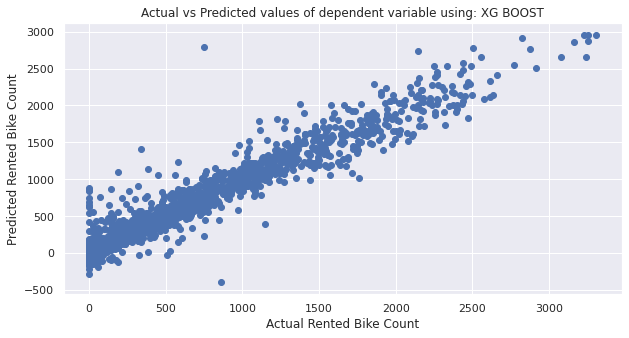

In [ ]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=xgb_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: XG BOOST')

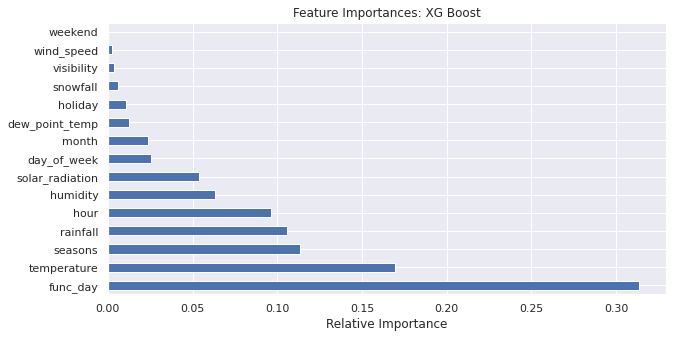

In [ ]:
# feature importance
xgb_feat_imp = pd.Series(xgb_gridsearch.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

Top 5 features used to build the XG Boost model:
* func_day
* temperature
* Season
* rainfall
* hour

# **Modeling summary:**

* We trained 7 Machine Learning models using the training dataset, and the its respective performance was improved through hyperparameter tuning.
* We initially started with the linear regression model, mainly because it is easily explainable to the stakeholders, and its low training time.
* It was necessary to improve the prediction accuracy, and reduce errors in the predictions.
* To achieve this, we fit a random forest model on the training data, and the final predictions showed less errors compared to that of decision tree model.
* To further improve the predictions of the model, we fit 2 boosting models namely; Gradient boosting machine (GBM) and Extreme gradient boost (XG Boost). The predictions obtained from these models showed errors in the same range, but the errors were lower than that of decision tree model.

---
# **Performance Comparision**
Now we will compare the perfomance of the above trained model based on the regression evaluation matrics.

---

In [ ]:
#sorting metrics
evaluation_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [ ]:
evaluation_df

,Model_Name,MAE,MSE,RMSE,SCORE
4,Random Forest Regression,98.86,29753.16,172.49,0.93
6,XG Boost Regression,114.13,31938.03,178.71,0.92
5,Gradient Boosting Regression,115.90,32574.62,180.48,0.92
3,Dicision Tree Regression,128.12,49828.92,223.22,0.88
1,Lasso Regression,315.86,178822.68,422.87,0.57
0,Linear Regression,315.88,178834.26,422.89,0.57
2,Ridge Regression,315.88,178834.26,422.89,0.57


Visualize the Results

(Text(0, 0.5, 'SCORE'), Text(0.5, 1.0, 'Score / R2 Score'))

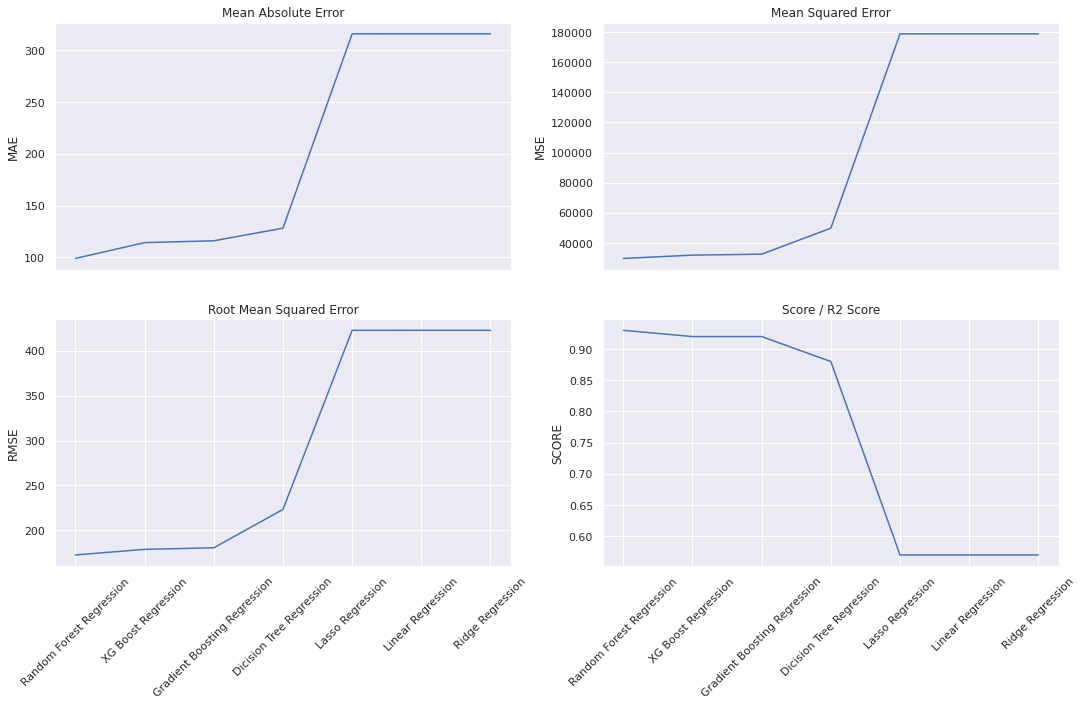

In [ ]:
# Plot the above result to compare
plt.rcParams['figure.figsize'] = (18,10)

plt.figure()
plt.subplot(2,2,1)                                                      # here e have used subplot to plot in paralle, subplot(nrow,ncolumn,nindex)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['MAE'])
plt.ylabel('MAE') ,plt.title('Mean Absolute Error')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)                                        # to remove the notation on x axis


plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['MSE'])
plt.ylabel('MSE') , plt.title('Mean Squared Error')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['RMSE'])
plt.ylabel('RMSE'), plt.title('Root Mean Squared Error')

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['SCORE'])
plt.ylabel('SCORE'), plt.title('Score / R2 Score')

Final choice of model depends on:
* It is necessary to have a model with the highest accuracy and lowest error, as well as less complexibility and enough explainability, and thus the predictions must be explained to stakeholders.

---
# **Conclusion**

---

* The target variable i.e dependent variable ( count of bike sharing demand) is highly dependent on input variables i.e independed variables.

* Linear regression did not give an excellent result. Ridge regression shrunk the parameters to reduce complexity and multicollinearity but ended up affecting the evaluation metrics and ended up giving up worse results than lasso regression. These three models gave almost the same results.

* Decision tree gave a moderate result than the previous three models but not enough score with 88 %.* Gradient Boosting and XG Boost regression gave the same result about 92 % score.

* Random Forest regression gives the highest result about 93 % score with minimum error than all other implemented models, so we can use the random forest regressor model for further prediction.

* As we have seen above while selecting a model should have well explainability and less complexibility. As per the result, we have all three models with higher accuracy and less error. but they are black box models, but in this case, accuracy is more important so that our final model can be the random forest regression.